<a href="https://colab.research.google.com/github/u1353279/MetOffice/blob/main/Auto_tsv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Little Rissington***



Data Analysis

In [1]:
import pandas as pd
import numpy as np

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'
rcParams['font.sans-serif'] = ['Lucida Console']

In [3]:
df=pd.read_excel('/content/drive/MyDrive/PHD/little_rissington.xlsx')

In [4]:
df

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Global Radiation (KJ/m2)
0,01/01/2010,0.3,-3.5,-1.60,0.0,10.0,19.0,5425.0
1,02/01/2010,3.9,-3.3,0.30,0.0,8.0,18.0,4761.0
2,03/01/2010,0.9,-2.0,-0.55,0.0,9.0,19.0,5416.0
3,04/01/2010,0.2,-7.7,-3.75,0.2,6.0,10.0,6301.0
4,05/01/2010,-0.1,-6.4,-3.25,8.0,7.0,15.0,2318.0
...,...,...,...,...,...,...,...,...
3647,27/12/2019,7.5,2.9,5.20,0.4,6.0,15.0,1348.0
3648,28/12/2019,8.5,4.7,6.60,0.0,10.0,20.0,1285.0
3649,29/12/2019,6.9,5.5,6.20,0.0,13.0,23.0,1651.0
3650,30/12/2019,7.6,4.1,5.85,0.0,11.0,20.0,3075.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
df.rename(columns={'Daily Maximum Temperature (0900-0900) (°C)': 'Max Temp',
                   'Daily Minimum Temperature (0900-0900) (°C)': 'Min Temp',
                  'Daily Mean Temperature (0900-0900) (°C)': 'Mean Temp',
          'Daily Total Rainfall (0900-0900)(mm)': 'Rainfall(mm)',
          'Daily Mean Windspeed (0100-2400) (kn)': 'Windspeed(kn)',
          'Daily Maximum Gust (0100-2400) (kn)': 'Max Gust(kn)',
          'Daily Total Global Radiation (KJ/m2)': 'Radiation(KJ/m2)'},
          inplace=True)

In [7]:
df.isnull().sum()

Date                 0
Max Temp            17
Min Temp            17
Mean Temp           21
Rainfall(mm)         0
Windspeed(kn)       31
Max Gust(kn)        31
Radiation(KJ/m2)    34
dtype: int64

In [8]:
# only show the missing values
df[df.filter(like='Max Temp').isnull().any(1)]

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
2478,2016-10-14,NaN,6.7,NaN,0.0,NaN,NaN,NaN
2479,2016-10-15,NaN,NaN,NaN,9.6,NaN,NaN,NaN
2480,2016-10-16,NaN,NaN,NaN,0.2,NaN,NaN,NaN
2481,2016-10-17,NaN,NaN,NaN,1.6,NaN,NaN,NaN
2482,2016-10-18,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2483,2016-10-19,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3500,2019-08-02,NaN,13.8,NaN,0.0,NaN,NaN,NaN
3501,2019-08-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3502,2019-08-04,NaN,NaN,NaN,0.6,NaN,NaN,NaN
3503,2019-08-05,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [9]:
#propogate the last valid observation forward
df.ffill()

,Date,Max Temp,Min Temp,Mean Temp,Rainfall(mm),Windspeed(kn),Max Gust(kn),Radiation(KJ/m2)
0,2010-01-01,0.3,-3.5,-1.60,0.0,10.0,19.0,5425.0
1,2010-01-02,3.9,-3.3,0.30,0.0,8.0,18.0,4761.0
2,2010-01-03,0.9,-2.0,-0.55,0.0,9.0,19.0,5416.0
3,2010-01-04,0.2,-7.7,-3.75,0.2,6.0,10.0,6301.0
4,2010-01-05,-0.1,-6.4,-3.25,8.0,7.0,15.0,2318.0
...,...,...,...,...,...,...,...,...
3647,2019-12-27,7.5,2.9,5.20,0.4,6.0,15.0,1348.0
3648,2019-12-28,8.5,4.7,6.60,0.0,10.0,20.0,1285.0
3649,2019-12-29,6.9,5.5,6.20,0.0,13.0,23.0,1651.0
3650,2019-12-30,7.6,4.1,5.85,0.0,11.0,20.0,3075.0


In [10]:
df.ffill(inplace=True)

In [11]:
df['month'] = df['Date'].dt.month

In [12]:
df['year'] = df['Date'].dt.year

In [13]:
df1=df[['Date','Radiation(KJ/m2)']]

In [14]:
df1

,Date,Radiation(KJ/m2)
0,2010-01-01,5425.0
1,2010-01-02,4761.0
2,2010-01-03,5416.0
3,2010-01-04,6301.0
4,2010-01-05,2318.0
...,...,...
3647,2019-12-27,1348.0
3648,2019-12-28,1285.0
3649,2019-12-29,1651.0
3650,2019-12-30,3075.0


In [15]:
train_df = df1.iloc[:, :3000]
test_df = df1.iloc[3000:, :]

In [16]:
train_df

,Date,Radiation(KJ/m2)
0,2010-01-01,5425.0
1,2010-01-02,4761.0
2,2010-01-03,5416.0
3,2010-01-04,6301.0
4,2010-01-05,2318.0
...,...,...
3647,2019-12-27,1348.0
3648,2019-12-28,1285.0
3649,2019-12-29,1651.0
3650,2019-12-30,3075.0


In [17]:
test_df

,Date,Radiation(KJ/m2)
3000,2018-03-20,9288.0
3001,2018-03-21,15722.0
3002,2018-03-22,7285.0
3003,2018-03-23,8673.0
3004,2018-03-24,5310.0
...,...,...
3647,2019-12-27,1348.0
3648,2019-12-28,1285.0
3649,2019-12-29,1651.0
3650,2019-12-30,3075.0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3652 non-null   datetime64[ns]
 1   Radiation(KJ/m2)  3652 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [19]:
train_df.set_index("Date", inplace=True)
test_df.set_index("Date", inplace=True)

In [20]:
train_df.head()

,Radiation(KJ/m2)
Date,
2010-01-01,5425.0
2010-01-02,4761.0
2010-01-03,5416.0
2010-01-04,6301.0
2010-01-05,2318.0


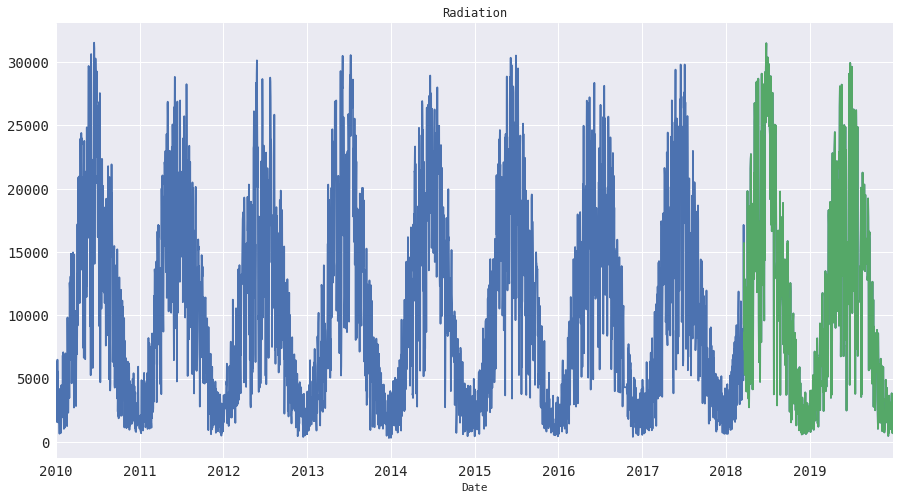

In [21]:
train_df['Radiation(KJ/m2)'].plot(figsize=(15,8), title= 'Radiation', fontsize=14)
test_df['Radiation(KJ/m2)'].plot(figsize=(15,8), title= 'Radiation', fontsize=14)
plt.show()

In [22]:
!pip install auto_ts --ignore-installed --no-cache-dir

     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 71kB 26.2MB/s 
     |████████████████████████████████| 11.6MB 13.0MB/s 
     |████████████████████████████████| 286kB 49.0MB/s 
     |████████████████████████████████| 9.5MB 47.5MB/s 
     |████████████████████████████████| 157.5MB 1.3MB/s 
     |████████████████████████████████| 9.5MB 47.0MB/s 
     |████████████████████████████████| 1.5MB 47.3MB/s 
     |████████████████████████████████| 788kB 38.9MB/s 
     |████████████████████████████████| 22.2MB 1.3MB/s 
     |████████████████████████████████| 788kB 27.6MB/s 
     |████████████████████████████████| 2.0MB 56.2MB/s 
     |████████████████████████████████| 67.3MB 1.2MB/s 
     |████████████████████████████████| 14.8MB 56.5MB/s 
     |████████████████████████████████| 51kB 37.2MB/s 
     |████████████████████████████████| 122kB 69.8MB/s 
     |████████████████████████████████| 235kB 40.2MB/s 
     |████████████████████████████████| 81kB 53.

In [22]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.32. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [31]:
model = auto_timeseries(forecast_period=652,
                        score_type='rmse', time_interval='D',seasonality=True,seasonal_period=4,
                        model_type='Prophet')

In [32]:
train_df.reset_index(inplace=True)

In [33]:
train_df.head()

,index,Date,Radiation(KJ/m2)
0,0,2010-01-01,5425.0
1,1,2010-01-02,4761.0
2,2,2010-01-03,5416.0
3,3,2010-01-04,6301.0
4,4,2010-01-05,2318.0


Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 2 regression: c autolag: None
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -11.252370798812079      |
|           p-value           |    1.6995521527334953e-20    |
|          #Lags Used         |             2.0              |
| Number of Observations Used |            3649.0            |
|     Critical Value (1%)     |     -3.4321433423211882      |
|     Critical Value (5%)     |      -2.862332398828442      |
|     Critical Value (10%)    |      -2.567191805919415      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Radiation(KJ/m2)
Start of loading of data.....
Input is data frame. Performing Time Series Anal

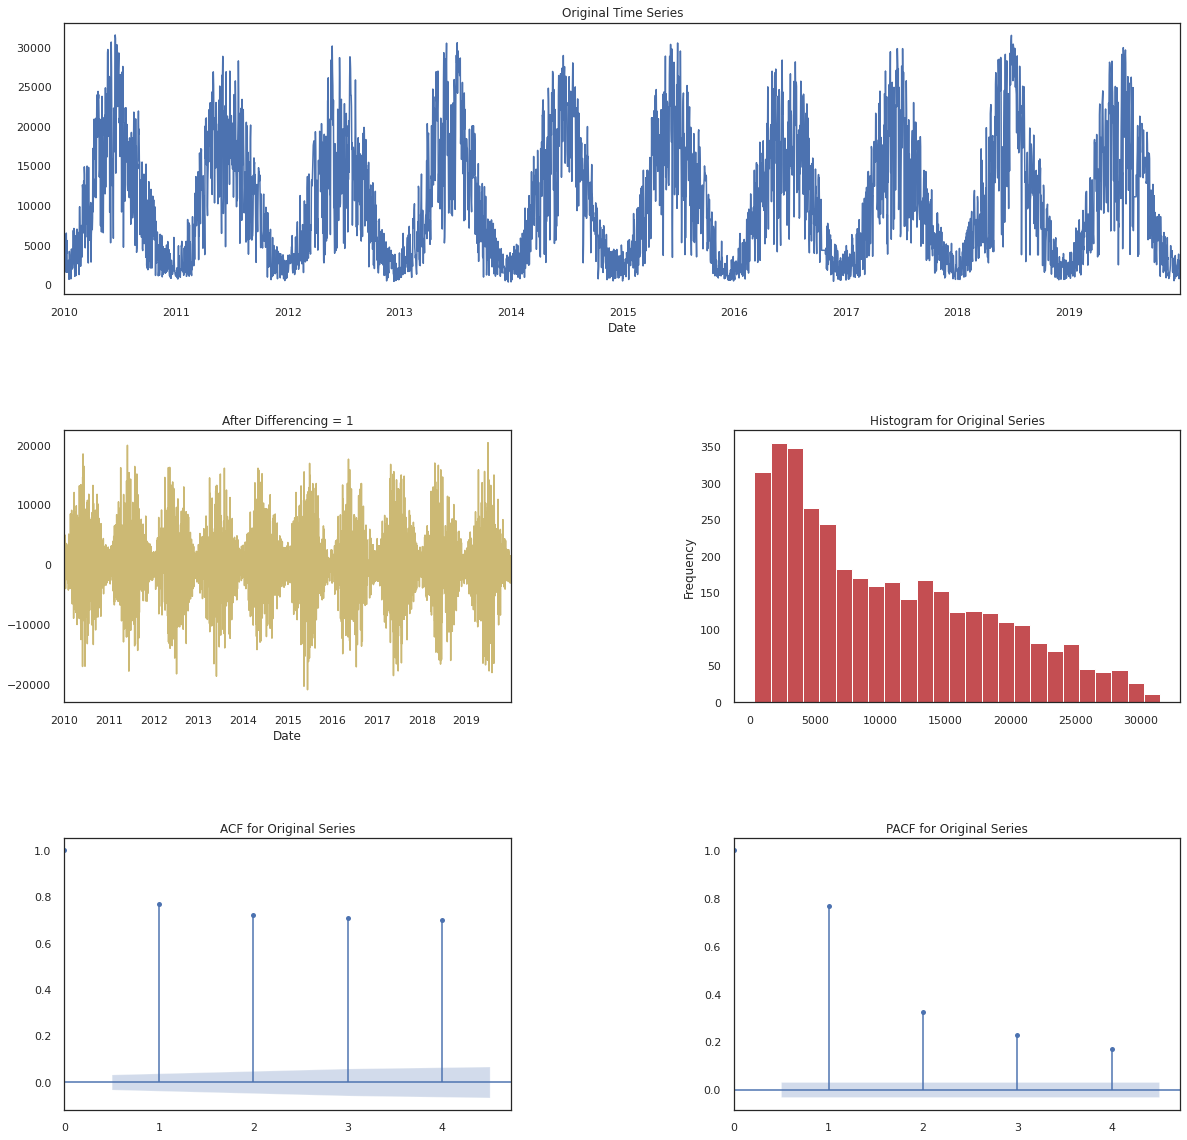

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
       Adding daily seasonality to Prophet with period=4, fourier_order=15 and prior_scale=0.10
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5
    RMSE = 46,792.92
    Std Deviation of Originals = 7,186.88
    Normalized RMSE = 651%
Cross Validation window: 1 completed
    RMSE = 4,893.71
    Std Deviation of Originals = 8,185.94
    Normalized RMSE = 60%
Cross Validation window: 2 completed
    RMSE = 4,333.70
    Std Deviation of Originals = 7,421.54
    Normalized RMSE = 58%
Cross Validation window: 3 completed
    RMSE = 4,266.01
    Std Deviation of Originals = 7,208.73
    Normalized RMSE = 59%
Cross Validation window: 4 completed
    RMSE = 5,067.95
    Std Deviation of Originals = 8,240.57
    Normalized RMSE = 61%
Cross Vali

In [34]:
model.fit(traindata= train_df, 
          ts_column="Date",
          target="Radiation(KJ/m2)")

In [40]:
future_predictions = model.predict(testdata=test_df)

Building Forecast dataframe. Forecast Period = 652


In [41]:
test_df.reset_index(inplace=True)

In [42]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values

In [43]:
test_df.head()

,level_0,index,Date,Radiation(KJ/m2),Prophet Predictions
0,0,0,2018-03-20,9288.0,7139.900777
1,1,1,2018-03-21,15722.0,7417.431894
2,2,2,2018-03-22,7285.0,7892.428285
3,3,3,2018-03-23,8673.0,7543.123225
4,4,4,2018-03-24,5310.0,7873.556506


In [44]:

test_df.set_index("Date", inplace=True)

In [45]:
test_df.head(3)

,level_0,index,Radiation(KJ/m2),Prophet Predictions
Date,,,,
2018-03-20,0,0,9288.0,7139.900777
2018-03-21,1,1,15722.0,7417.431894
2018-03-22,2,2,7285.0,7892.428285


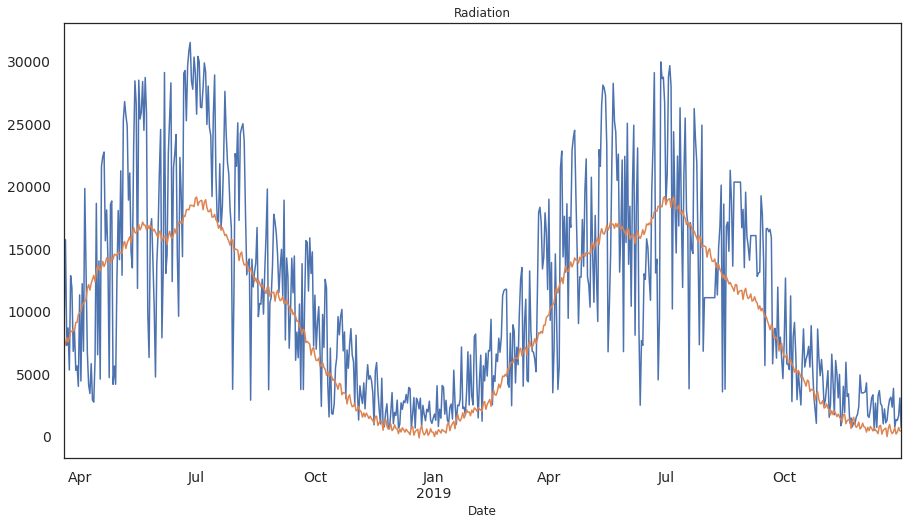

In [46]:
test_df["Radiation(KJ/m2)"].plot(figsize=(15,8), title= 'Radiation', fontsize=14)
test_df["Prophet Predictions"].plot(figsize=(15,8), title= 'Radiation', fontsize=14)
plt.show()